# **1 Set-up**

## **1.1 Define Variables**

In [1]:
target_variable = {
    "xco2": "/data3/interns/NRT_CO2_Emission_Map_Project/HaoHu_work/XCO2_resample/global_grid_0.1_2019_2025_xco2.nc",
    "emission": "/data3/interns/NRT_CO2_Emission_Map_Project/ML_XCO2/CarbonMonitor0Power_emission_201901_202505.nc"  
}
feature_variables = {
    "t2m": "/data3/interns/NRT_CO2_Emission_Map_Project/HaoHu_work/ERA5_resample/t2m_daily_0p1deg.nc",
    "d2m": "/data3/interns/NRT_CO2_Emission_Map_Project/HaoHu_work/ERA5_resample/d2m_daily_0p1deg.nc",
    "u10": "/data3/interns/NRT_CO2_Emission_Map_Project/HaoHu_work/ERA5_resample/u10_daily_0p1deg.nc",
    "v10": "/data3/interns/NRT_CO2_Emission_Map_Project/HaoHu_work/ERA5_resample/v10_daily_0p1deg.nc",
    "msl": "/data3/interns/NRT_CO2_Emission_Map_Project/HaoHu_work/ERA5_resample/msl_daily_0p1deg.nc",
    "sp": "/data3/interns/NRT_CO2_Emission_Map_Project/HaoHu_work/ERA5_resample/sp_daily_0p1deg.nc",
    "skt": "/data3/interns/NRT_CO2_Emission_Map_Project/HaoHu_work/ERA5_resample/skt_daily_0p1deg.nc",
    "tp": "/data3/interns/NRT_CO2_Emission_Map_Project/HaoHu_work/ERA5_resample/tp_daily_0p1deg.nc",
    "e": "/data3/interns/NRT_CO2_Emission_Map_Project/HaoHu_work/ERA5_resample/e_daily_0p1deg.nc",
    "ssr": "/data3/interns/NRT_CO2_Emission_Map_Project/HaoHu_work/ERA5_resample/ssr_daily_0p1deg.nc",
    "str": "/data3/interns/NRT_CO2_Emission_Map_Project/HaoHu_work/ERA5_resample/str_daily_0p1deg.nc",
    "tcw": "/data3/interns/NRT_CO2_Emission_Map_Project/HaoHu_work/ERA5_resample/tcw_daily_0p1deg.nc",
    "blh": "/data3/interns/NRT_CO2_Emission_Map_Project/HaoHu_work/ERA5_resample/blh_daily_0p1deg.nc",
    
    "NO2": "/data3/interns/NRT_CO2_Emission_Map_Project/HaoHu_work/XCO2_resample/global_grid_0.1_2019_2025_NO2.nc",
    "is_weekend": "/data3/interns/NRT_CO2_Emission_Map_Project/HaoHu_work/XCO2_resample/global_grid_0.1_2019_2025_weekday_weekend.nc",
    "population": "/data3/interns/NRT_CO2_Emission_Map_Project/MingjuanZhang_work/Population_global_0.1degree_2019_2025_ns.nc",
    "elevation": "/data3/interns/NRT_CO2_Emission_Map_Project/MingjuanZhang_work/SRTM_elevation_global_0.1degree_2019_2025_ns.nc",
    "landuse": "/data3/interns/NRT_CO2_Emission_Map_Project/MingjuanZhang_work/Landuse_global_0.1degree_2019_2025_ns.nc",
    "aspect": "/data3/interns/NRT_CO2_Emission_Map_Project/MingjuanZhang_work/SRTM_aspect_global_0.1degree_2019_2025_ns.nc",
    "ndvi": "/data3/interns/NRT_CO2_Emission_Map_Project/MingjuanZhang_work/NDVI_global_0.1degree_2019_2025_ns.nc",
    "gpp": "/data3/interns/NRT_CO2_Emission_Map_Project/MingjuanZhang_work/GPP_global_0.1degree_2019_2025_ns.nc",
    "lai": "/data3/interns/NRT_CO2_Emission_Map_Project/MingjuanZhang_work/LAI_global_0.1degree_2019_2025_ns.nc",
    "ntl": "/data3/interns/NRT_CO2_Emission_Map_Project/MingjuanZhang_work/VIIRS_NTL_global_0.1degree_2019_2025_ns.nc",
    "evi": "/data3/interns/NRT_CO2_Emission_Map_Project/MingjuanZhang_work/EVI_global_0.1degree_2019_2025_ns.nc",
    "slope": "/data3/interns/NRT_CO2_Emission_Map_Project/MingjuanZhang_work/SRTM_slope_global_0.1degree_2019_2025_ns.nc",
    "odiac": "/data3/interns/NRT_CO2_Emission_Map_Project/HaoHu_work/odiac_interp_2019_2025.nc",
    "CO2_fire": "/data3/interns/NRT_CO2_Emission_Map_Project/PinyiLu_work/GFAS_resample/GFAS_resample_final.nc",

}


## **1.2 Load Modules**

In [ ]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
import geopandas as gpd
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import LinearSegmentedColormap
import os, glob

# **2. Plot figures**

## **2.1 Read files**

In [ ]:
data = np.load("../xco2_nonnan_processed.npy", allow_pickle=True)

df = pd.DataFrame(data)

df=df[(df["year"]==2021) & (df["month"]==12) & (df["day"]==4)]

df

lat     lon        xco2  emission        t2m         d2m  \
13277624 -84.95 -172.55  421.210297       0.0 -18.874929  243.483215   
13277625 -84.85 -176.65  412.817413       0.0 -18.605167  244.859497   
13277626 -77.85 -169.55  411.716644       0.0  -5.614365  264.454987   
13277627 -77.85 -169.45  411.726593       0.0  -5.592535  264.478668   
13277628 -77.85 -169.35  411.550781       0.0  -5.571403  264.501862   
...         ...     ...         ...       ...        ...         ...   
13293348  49.85   78.75  418.311646       0.0  -3.361403  265.054596   
13293349  49.85   78.95  419.239441       0.0  -3.552054  265.568542   
13293350  49.95   32.05  418.028473       0.0  -1.714625  269.660736   
13293351  49.95   32.15  417.958313       0.0  -1.660328  269.666473   
13293352  49.95  122.55  415.164429       0.0 -12.053896  258.337769   

               u10       v10            msl            sp  ...  lu_8.0  \
13277624  0.050178  0.725414   98056.109375  77069.796875  ...   False   
13277625  0.478502  1.243239   98132.078125  81259.000000  ...   False   
13277626 -0.513261  2.348244   97821.218750  97819.750000  ...   False   
13277627 -0.475385  2.322635   97821.007812  97817.695312  ...   False   
13277628 -0.437547  2.297059   97820.796875  97815.601562  ...   False   
...            ...       ...            ...           ...  ...     ...   
13293348  0.900381  0.976244  103190.664062  98674.062500  ...   False   
13293349  0.648415  1.211817  103193.250000  98633.867188  ...   False   
13293350  0.680271  0.555467  101402.242188  99988.054688  ...   False   
13293351  0.679503  0.479214  101403.054688  99989.343750  ...   False   
13293352  3.108476  1.485498  101422.984375  91820.375000  ...    True   

          lu_9.0  year  month  day     month_sin  month_cos     geo_x  \
13277624   False  2021     12    4 -2.449294e-16        1.0 -0.087282   
13277625   False  2021     12    4 -2.449294e-16        1.0 -0.089610   
13277626   False  2021     12    4 -2.449294e-16        1.0 -0.206981   
13277627   False  2021     12    4 -2.449294e-16        1.0 -0.206914   
13277628   False  2021     12    4 -2.449294e-16        1.0 -0.206846   
...          ...   ...    ...  ...           ...        ...       ...   
13293348   False  2021     12    4 -2.449294e-16        1.0  0.125792   
13293349   False  2021     12    4 -2.449294e-16        1.0  0.123584   
13293350   False  2021     12    4 -2.449294e-16        1.0  0.545384   
13293351   False  2021     12    4 -2.449294e-16        1.0  0.544787   
13293352   False  2021     12    4 -2.449294e-16        1.0 -0.346202   

             geo_y     geo_z  
13277624 -0.011413 -0.996118  
13277625 -0.005245 -0.995963  
13277626 -0.038175 -0.977600  
13277627 -0.038536 -0.977600  
13277628 -0.038897 -0.977600  
...            ...       ...  
13293348  0.632401  0.764359  
13293349  0.632837  0.764359  
13293350  0.341456  0.765483  
13293351  0.342407  0.765483  
13293352  0.542383  0.765483  

[15729 rows x 55 columns]

## **2.2 Plot XCO2 spatial**

### **2.2.1 Global**

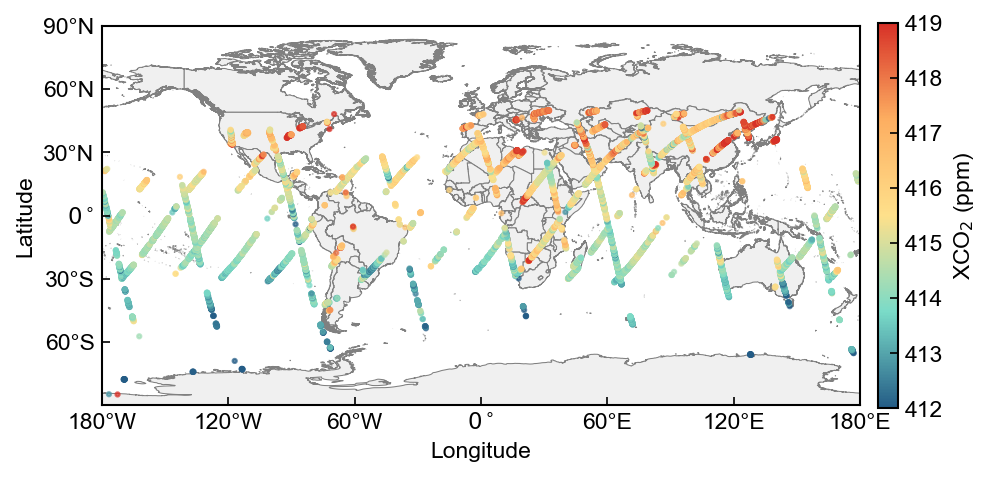

In [ ]:
mpl.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Arial", "Helvetica", "DejaVu Sans"],
    "font.size": 11,    
    "axes.linewidth": 1.0,
    "axes.labelsize": 11,
    "axes.titlesize": 11,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 4,
    "ytick.major.size": 4,
    "legend.frameon": False,
})


df_day = df.copy()
for col in ["lon","lat","xco2"]:
    assert col in df_day.columns, f"缺少列：{col}"

world = gpd.read_file("../world/admin_world_country.shp")
world = world.set_crs(epsg=4326) if world.crs is None else world.to_crs(epsg=4326)

gdf_pts = gpd.GeoDataFrame(
    df_day,
    geometry=gpd.points_from_xy(df_day["lon"], df_day["lat"]),
    crs="EPSG:4326"
)

qlo, qhi = np.nanpercentile(gdf_pts["xco2"], [2, 98])
vmin = 412
vmax = 419
if not np.isfinite(vmin) or not np.isfinite(vmax) or vmin >= vmax:
    vmin, vmax = gdf_pts["xco2"].min(), gdf_pts["xco2"].max()

colors = ["#245c86","#7ADBC8","#fee08b","#fdae61","#d73027"]
cmap = LinearSegmentedColormap.from_list("w-b-g-y-o-r", colors, N=256)
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

fig, ax = plt.subplots(figsize=(7.0, 3.8), dpi=150)  

world.plot(ax=ax, color="#f0f0f0", edgecolor="0.5", linewidth=0.5, zorder=0)

gdf_pts.plot(
    ax=ax,
    column="xco2",
    cmap=cmap,
    markersize=4,
    alpha=0.7,
    vmin=412, vmax=419,
    legend=False,
    zorder=1
)

sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, shrink=0.75, pad=0.02)
cbar.set_label("XCO$_2$ (ppm)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

def lon_formatter(x, pos):
    if np.isnan(x): return ""
    if x == 0: return r"$0^\circ$"
    hemi = "E" if x > 0 else "W"
    return f"{abs(int(x))}°{hemi}"

def lat_formatter(y, pos):
    if np.isnan(y): return ""
    if y == 0: return r"$0^\circ$"
    hemi = "N" if y > 0 else "S"
    return f"{abs(int(y))}°{hemi}"

ax.set_xticks(np.arange(-180, 181, 60))
ax.set_yticks(np.arange(-60, 91, 30)) 

ax.xaxis.set_major_formatter(FuncFormatter(lon_formatter))
ax.yaxis.set_major_formatter(FuncFormatter(lat_formatter))

ax.set_xlim(-180, 180)
ax.set_ylim(-90, 90)
ax.set_aspect("equal", adjustable="box")
ax.grid(False)

plt.tight_layout()
plt.show()


### **2.2.2 Regional**

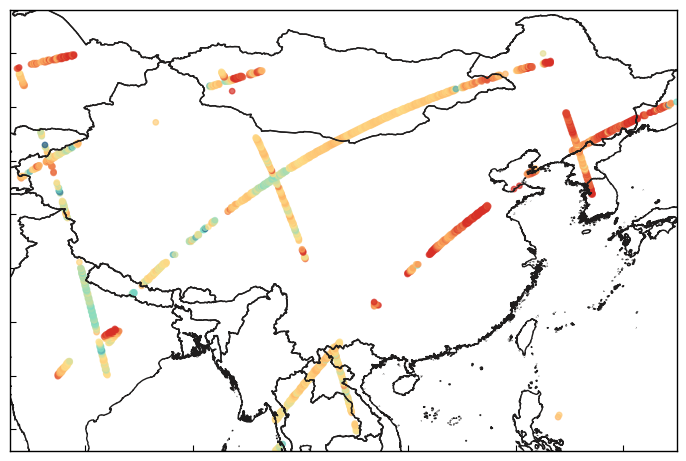

In [ ]:
fig, ax = plt.subplots(figsize=(7.0, 7))

lon_min, lon_max = 73, 135
lat_min, lat_max = 13, 54

mask = (
    (gdf_pts["lon"] >= lon_min) & (gdf_pts["lon"] <= lon_max) &
    (gdf_pts["lat"] >= lat_min) & (gdf_pts["lat"] <= lat_max)
)
gdf_plot = gdf_pts.loc[mask].copy()

world_clip = world.cx[lon_min:lon_max, lat_min:lat_max]
world_clip.plot(ax=ax, color='none', edgecolor="#1F1D1D", linewidth=1, zorder=2)

gdf_plot.plot(
    ax=ax,
    column="xco2",
    cmap=cmap,
    vmin=vmin, vmax=vmax,
    markersize=15, alpha=0.7,
    legend=False, zorder=1
)

ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)
ax.set_aspect("equal", adjustable="box")
ax.grid(False)
ax.set_xlabel("")
ax.set_ylabel("")
ax.tick_params(axis="both", which="both", labelbottom=False, labelleft=False)

plt.tight_layout()
plt.show()

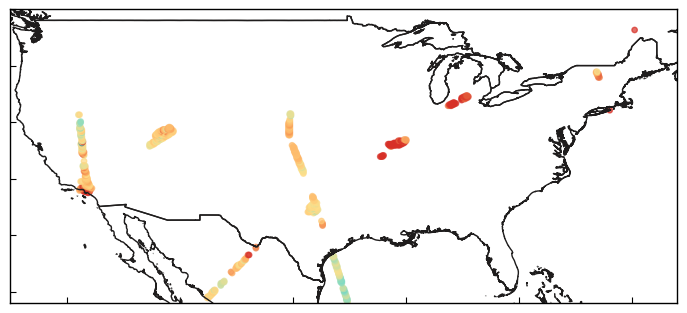

In [ ]:
fig, ax = plt.subplots(figsize=(7.0, 7))
lon_min, lon_max = -125, -66
lat_min, lat_max = 24, 50
mask = (
    (gdf_pts["lon"] >= lon_min) & (gdf_pts["lon"] <= lon_max) &
    (gdf_pts["lat"] >= lat_min) & (gdf_pts["lat"] <= lat_max)
)
gdf_plot = gdf_pts.loc[mask].copy()
world_clip = world.cx[lon_min:lon_max, lat_min:lat_max]
world_clip.plot(ax=ax, color='none', edgecolor="#1F1D1D", linewidth=1, zorder=2)
gdf_plot.plot(
    ax=ax,
    column="xco2",
    cmap=cmap,
    vmin=vmin, vmax=vmax,
    markersize=15, alpha=0.7,
    legend=False, zorder=1
)

ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)
ax.set_aspect("equal", adjustable="box")
ax.grid(False)
ax.set_xlabel("")
ax.set_ylabel("")
ax.tick_params(axis="both", which="both", labelbottom=False, labelleft=False)

plt.tight_layout()
plt.show()

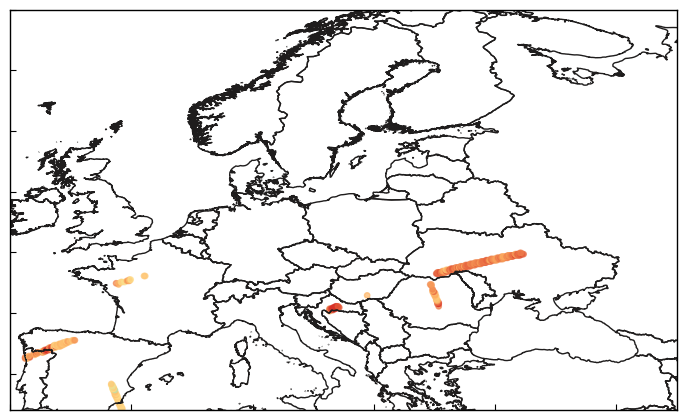

In [ ]:
fig, ax = plt.subplots(figsize=(7.0, 7))

lon_min, lon_max = -10, 45 
lat_min, lat_max = 37, 70

mask = (
    (gdf_pts["lon"] >= lon_min) & (gdf_pts["lon"] <= lon_max) &
    (gdf_pts["lat"] >= lat_min) & (gdf_pts["lat"] <= lat_max)
)
gdf_plot = gdf_pts.loc[mask].copy()

world_clip = world.cx[lon_min:lon_max, lat_min:lat_max]
world_clip.plot(ax=ax, color='none', edgecolor="#1F1D1D", linewidth=1, zorder=2)

gdf_plot.plot(
    ax=ax,
    column="xco2",
    cmap=cmap,
    vmin=vmin, vmax=vmax,
    markersize=15, alpha=0.7,
    legend=False, zorder=1
)

ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)
ax.set_aspect("equal", adjustable="box")
ax.grid(False)
ax.set_xlabel("")
ax.set_ylabel("")
ax.tick_params(axis="both", which="both", labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()

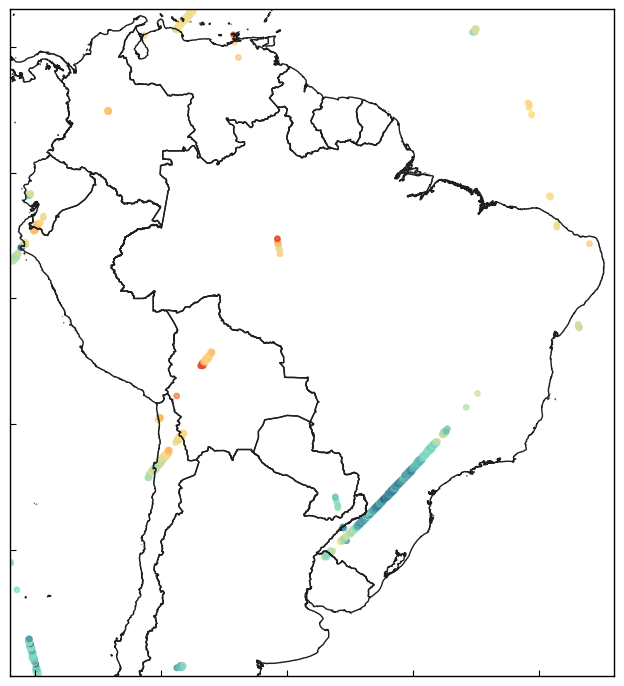

In [ ]:
fig, ax = plt.subplots(figsize=(7.0, 7))

lon_min, lon_max = -82, -34
lat_min, lat_max = -40, 13
mask = (
    (gdf_pts["lon"] >= lon_min) & (gdf_pts["lon"] <= lon_max) &
    (gdf_pts["lat"] >= lat_min) & (gdf_pts["lat"] <= lat_max)
)
gdf_plot = gdf_pts.loc[mask].copy()

world_clip = world.cx[lon_min:lon_max, lat_min:lat_max]
world_clip.plot(ax=ax, color='none', edgecolor="#1F1D1D", linewidth=1, zorder=2)
gdf_plot.plot(
    ax=ax,
    column="xco2",
    cmap=cmap,
    vmin=vmin, vmax=vmax,
    markersize=15, alpha=0.7,
    legend=False, zorder=1
)

ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)
ax.set_aspect("equal", adjustable="box")
ax.grid(False)
ax.set_xlabel("")
ax.set_ylabel("")
ax.tick_params(axis="both", which="both", labelbottom=False, labelleft=False)

plt.tight_layout()
plt.show()

## **2.3 Plot fiiling Map**

### **2.3.1 Global**

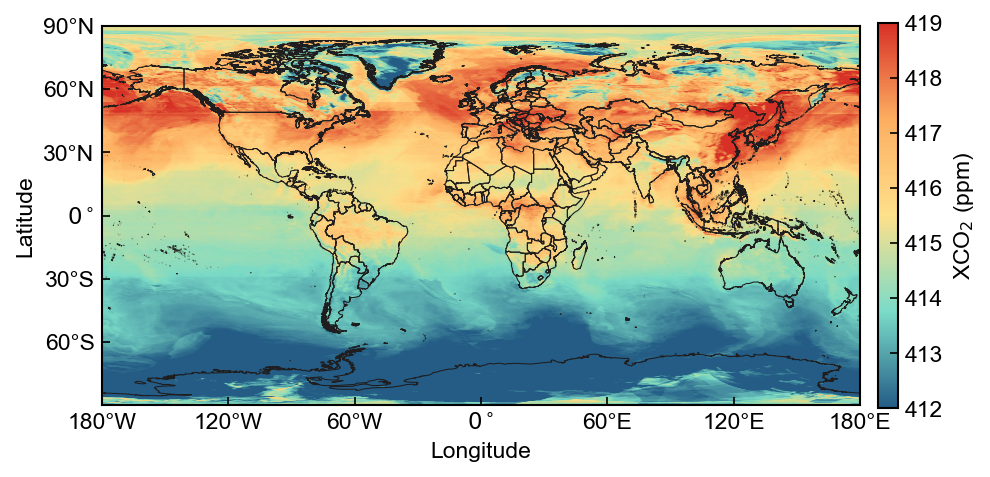

In [ ]:
npy_path="../XCO2_prediction_full/monthly_xco2_full_2021_12.npy"

df = pd.DataFrame(np.load(npy_path, allow_pickle=True))
df = df[ df["time"] =="2021-12-04"]

mpl.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Arial", "Helvetica", "DejaVu Sans"],
    "font.size": 11,          
    "axes.linewidth": 1.0,
    "axes.labelsize": 11,
    "axes.titlesize": 11,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 4,
    "ytick.major.size": 4,
    "legend.frameon": False,
})

df_day = df.copy()

world = gpd.read_file("../world/admin_world_country.shp")
world = world.set_crs(epsg=4326) if world.crs is None else world.to_crs(epsg=4326)

gdf_pts = gpd.GeoDataFrame(
    df_day,
    geometry=gpd.points_from_xy(df_day["lon"], df_day["lat"]),
    crs="EPSG:4326"
)

qlo, qhi = np.nanpercentile(gdf_pts["xco2_pred"], [2, 98])
vmin = 412
vmax = 419
if not np.isfinite(vmin) or not np.isfinite(vmax) or vmin >= vmax:
    vmin, vmax = gdf_pts["xco2_pred"].min(), gdf_pts["xco2_pred"].max()

colors = ["#245c86","#7ADBC8","#fee08b","#fdae61","#d73027"]
cmap = LinearSegmentedColormap.from_list("w-b-g-y-o-r", colors, N=256)

norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)


fig, ax = plt.subplots(figsize=(7.0, 3.8), dpi=150)  

world.plot(ax=ax,color='none', edgecolor="#1F1D1D", linewidth=0.5, zorder=2)
gdf_pts.plot(
    ax=ax,
    column="xco2_pred",
    cmap=cmap,
    markersize=4,
    alpha=0.7,
    vmin=vmin, vmax=vmax,
    legend=False,
    zorder=1
)

sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, shrink=0.75, pad=0.02)
cbar.set_label("XCO$_2$ (ppm)")

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

def lon_formatter(x, pos):
    if np.isnan(x): return ""
    if x == 0: return r"$0^\circ$"
    hemi = "E" if x > 0 else "W"
    return f"{abs(int(x))}°{hemi}"

def lat_formatter(y, pos):
    if np.isnan(y): return ""
    if y == 0: return r"$0^\circ$"
    hemi = "N" if y > 0 else "S"
    return f"{abs(int(y))}°{hemi}"

ax.set_xticks(np.arange(-180, 181, 60))
ax.set_yticks(np.arange(-60, 91, 30)) 

ax.xaxis.set_major_formatter(FuncFormatter(lon_formatter))
ax.yaxis.set_major_formatter(FuncFormatter(lat_formatter))

ax.set_xlim(-180, 180)
ax.set_ylim(-90, 90)
ax.set_aspect("equal", adjustable="box")

ax.grid(False)

plt.tight_layout()
plt.show()

### **2.3.2 Regional**

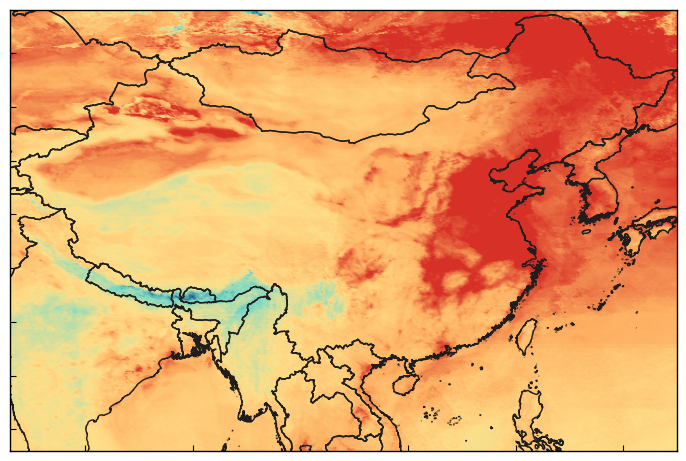

In [ ]:
fig, ax = plt.subplots(figsize=(7.0, 7))

lon_min, lon_max = 73, 135
lat_min, lat_max = 13, 54

mask = (
    (gdf_pts["lon"] >= lon_min) & (gdf_pts["lon"] <= lon_max) &
    (gdf_pts["lat"] >= lat_min) & (gdf_pts["lat"] <= lat_max)
)
gdf_plot = gdf_pts.loc[mask].copy()

world_clip = world.cx[lon_min:lon_max, lat_min:lat_max]
world_clip.plot(ax=ax, color='none', edgecolor="#1F1D1D", linewidth=1, zorder=2)

gdf_plot.plot(
    ax=ax,
    column="xco2_pred",
    cmap=cmap,
    vmin=vmin, vmax=vmax,
    markersize=4, alpha=0.7,
    legend=False, zorder=1
)

ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)
ax.set_aspect("equal", adjustable="box")
ax.grid(False)
ax.set_xlabel("")
ax.set_ylabel("")
ax.tick_params(axis="both", which="both", labelbottom=False, labelleft=False)

plt.tight_layout()
plt.show()

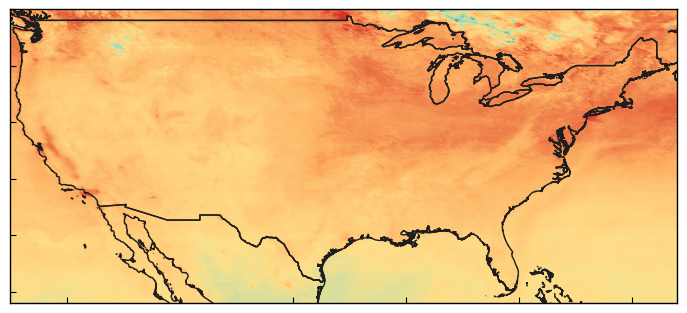

In [ ]:
fig, ax = plt.subplots(figsize=(7.0, 7))

lon_min, lon_max = -125, -66
lat_min, lat_max = 24, 50

mask = (
    (gdf_pts["lon"] >= lon_min) & (gdf_pts["lon"] <= lon_max) &
    (gdf_pts["lat"] >= lat_min) & (gdf_pts["lat"] <= lat_max)
)
gdf_plot = gdf_pts.loc[mask].copy()

world_clip = world.cx[lon_min:lon_max, lat_min:lat_max]
world_clip.plot(ax=ax, color='none', edgecolor="#1F1D1D", linewidth=1, zorder=2)

gdf_plot.plot(
    ax=ax,
    column="xco2_pred",
    cmap=cmap,
    vmin=vmin, vmax=vmax,
    markersize=4, alpha=0.7,
    legend=False, zorder=1
)

ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)
ax.set_aspect("equal", adjustable="box")
ax.grid(False)
ax.set_xlabel("")
ax.set_ylabel("")
ax.tick_params(axis="both", which="both", labelbottom=False, labelleft=False)

plt.tight_layout()
plt.show()

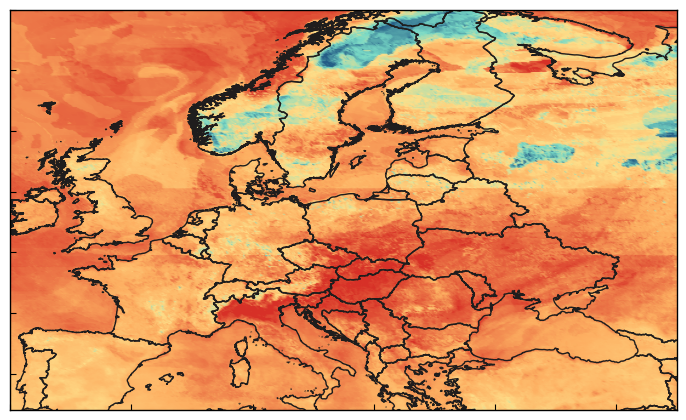

In [ ]:
fig, ax = plt.subplots(figsize=(7.0, 7))

lon_min, lon_max = -10, 45 
lat_min, lat_max = 37, 70

mask = (
    (gdf_pts["lon"] >= lon_min) & (gdf_pts["lon"] <= lon_max) &
    (gdf_pts["lat"] >= lat_min) & (gdf_pts["lat"] <= lat_max)
)
gdf_plot = gdf_pts.loc[mask].copy()

world_clip = world.cx[lon_min:lon_max, lat_min:lat_max]
world_clip.plot(ax=ax, color='none', edgecolor="#1F1D1D", linewidth=1, zorder=2)

gdf_plot.plot(
    ax=ax,
    column="xco2_pred",
    cmap=cmap,
    vmin=vmin, vmax=vmax,
    markersize=4, alpha=0.7,
    legend=False, zorder=1
)

ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)
ax.set_aspect("equal", adjustable="box")
ax.grid(False)
ax.set_xlabel("")
ax.set_ylabel("")
ax.tick_params(axis="both", which="both", labelbottom=False, labelleft=False)


plt.tight_layout()
plt.show()


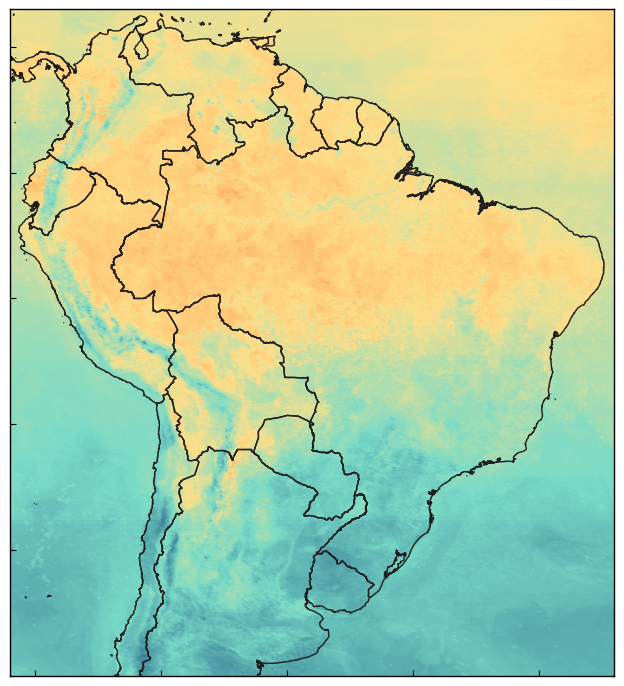

In [ ]:
fig, ax = plt.subplots(figsize=(7.0, 7))

lon_min, lon_max = -82, -34   
lat_min, lat_max = -40, 13

mask = (
    (gdf_pts["lon"] >= lon_min) & (gdf_pts["lon"] <= lon_max) &
    (gdf_pts["lat"] >= lat_min) & (gdf_pts["lat"] <= lat_max)
)
gdf_plot = gdf_pts.loc[mask].copy()

world_clip = world.cx[lon_min:lon_max, lat_min:lat_max]
world_clip.plot(ax=ax, color='none', edgecolor="#1F1D1D", linewidth=1, zorder=2)

gdf_plot.plot(
    ax=ax,
    column="xco2_pred",
    cmap=cmap,
    vmin=vmin, vmax=vmax,
    markersize=4, alpha=0.7,
    legend=False, zorder=1
)

ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)
ax.set_aspect("equal", adjustable="box")
ax.grid(False)
ax.set_xlabel("")
ax.set_ylabel("")
ax.tick_params(axis="both", which="both", labelbottom=False, labelleft=False)

plt.tight_layout()
plt.show()

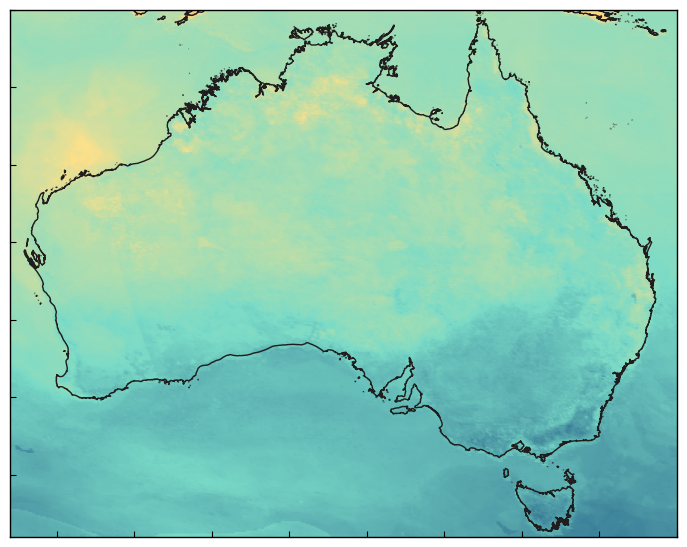

In [ ]:
fig, ax = plt.subplots(figsize=(7.0, 7))

lon_min, lon_max = 112, 155
lat_min, lat_max = -44, -10

mask = (
    (gdf_pts["lon"] >= lon_min) & (gdf_pts["lon"] <= lon_max) &
    (gdf_pts["lat"] >= lat_min) & (gdf_pts["lat"] <= lat_max)
)
gdf_plot = gdf_pts.loc[mask].copy()

world_clip = world.cx[lon_min:lon_max, lat_min:lat_max]
world_clip.plot(ax=ax, color='none', edgecolor="#1F1D1D", linewidth=1, zorder=2)

gdf_plot.plot(
    ax=ax,
    column="xco2_pred",
    cmap=cmap,
    vmin=vmin, vmax=vmax,
    markersize=4, alpha=0.7,
    legend=False, zorder=1
)

ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)
ax.set_aspect("equal", adjustable="box")
ax.grid(False)
ax.set_xlabel("")
ax.set_ylabel("")
ax.tick_params(axis="both", which="both", labelbottom=False, labelleft=False)

plt.tight_layout()
plt.show()

## **2.4 Plot Colorbar**

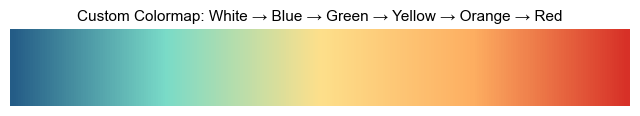

In [ ]:
colors = ["#245c86","#7ADBC8","#fee08b","#fdae61","#d73027"]
cmap = LinearSegmentedColormap.from_list("w-b-g-y-o-r", colors, N=256)

gradient = np.linspace(0, 1, 256).reshape(1, -1)
plt.figure(figsize=(8, 1))
plt.imshow(gradient, aspect="auto", cmap=cmap)
plt.axis("off")
plt.title("Custom Colormap: White → Blue → Green → Yellow → Orange → Red")
plt.show()